#### Status : 
Analysis done .,

Kindly add new ideas to results and discussion
add comments where ever necessary

In [2]:
!pip install scipy==1.1.0

# Assignment 1 : Linear Programming for maximizing Revenue for the flight operator

## Importing necessary Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving capacity.txt to capacity.txt
Saving demand.txt to demand.txt
Saving fare.txt to fare.txt
Saving it_leg.txt to it_leg.txt
User uploaded file "capacity.txt" with length 1379 bytes
User uploaded file "demand.txt" with length 244002 bytes
User uploaded file "fare.txt" with length 234685 bytes
User uploaded file "it_leg.txt" with length 445783 bytes


## Reading the data files

In [0]:
def read_data(filename):
    """ Reads the text file and returns the data"""
    with open(filename, "r") as f:
        data = f.readlines()
        array_data = []
        for line in data:
            words = line.split()
            array_data.append(words)
    array_data = pd.DataFrame(array_data)
    return(array_data)

In [0]:
capacity_data = read_data("capacity.txt")
demand_data = read_data("demand.txt")
fare_data = read_data("fare.txt")
it_leg_data = read_data("it_leg.txt")

In [0]:
#Renaming column name for clarity
capacity_data.columns = np.array(['Flight','Capacity'])
demand_data.columns =np.array(['Itinerary','Demand'])
fare_data.columns = np.array(['Itinerary','Fare'])
it_leg_data.columns = np.array(['Itinerary','Flight'])

In [0]:
#changing the data type
capacity_data.Capacity = capacity_data.Capacity.astype('int64')
fare_data.Fare = fare_data.Fare.astype("float64")
demand_data.Demand = demand_data.Demand.astype("float64")


## Preliminary Analysis

In [11]:
print(capacity_data.head() , " \t shape of the data : " ,capacity_data.shape)
print(fare_data.head() , " \t shape of the data : ", fare_data.shape)
print(demand_data.head() , " \t shape of the data : " ,demand_data.shape )

                   Flight  Capacity
0  LX0006420020920ZRHMIAF         6
1  LX0006420020920ZRHMIAC        23
2  LX0006420020920ZRHMIAY       120
3  LX0009520020919EZEGRUF        12
4  LX0009520020919EZEGRUC        50  	 shape of the data :  (53, 2)
             Itinerary    Fare
0  20**I******20020920  378.48
1  20BEIBOMBRU20020920  217.54
2  20INIBOMBRU20020920  539.42
3  23**I******20020920  682.10
4  23CHIZRHNRT20020920  682.10  	 shape of the data :  (7949, 2)
             Itinerary  Demand
0  20**I******20020920  0.0922
1  20BEIBOMBRU20020920  0.2844
2  20INIBOMBRU20020920  1.1751
3  23**I******20020920  0.0000
4  23CHIZRHNRT20020920  0.0000  	 shape of the data :  (7949, 2)


In [12]:
print(it_leg_data.head(), " \t shape of the data : ",it_leg_data.shape)

print("\n the number of unique itinerary .. ", len(it_leg_data.Itinerary.unique()))
print("the number of unique Flight .. ", len(it_leg_data.Flight.unique()))

print(" the size matches perfectly")

             Itinerary                  Flight
0  20**I******20020920  LX0015520020920BOMZRHY
1  20BEIBOMBRU20020920  LX0015520020920BOMZRHY
2  20INIBOMBRU20020920  LX0015520020920BOMZRHY
3  23**I******20020920  LX0016820020920ZRHNRTY
4  23CHIZRHNRT20020920  LX0016820020920ZRHNRTY  	 shape of the data :  (9513, 2)

 the number of unique itinerary ..  7949
the number of unique Flight ..  53
 the size matches perfectly


In [0]:
#Dictionary for flight used in itenerary - 53 rows
it_flight_dict = {}

for i in it_leg_data.Flight.unique():
    it_flight_dict[i] = it_leg_data[it_leg_data['Flight']==i]['Itinerary'].tolist()

#Dictionary for itinerary to flight mappings reverse
flight_it_dict = {}

for i in it_leg_data.Itinerary.unique():
    flight_it_dict[i] = it_leg_data[it_leg_data['Itinerary']==i]['Flight'].tolist()

In [14]:
for i,j in it_flight_dict.items():
  print("Flight ID: " + str(i) + " The number of itinerary possible for the flight : " + str(len(j)))

Flight ID: LX0015520020920BOMZRHY The number of itinerary possible for the flight : 569
Flight ID: LX0016820020920ZRHNRTY The number of itinerary possible for the flight : 337
Flight ID: LX0006420020920ZRHMIAY The number of itinerary possible for the flight : 367
Flight ID: LX0009520020919GRUZRHY The number of itinerary possible for the flight : 890
Flight ID: LX0024720020920KHIDXBY The number of itinerary possible for the flight : 397
Flight ID: LX0024720020920DXBZRHY The number of itinerary possible for the flight : 904
Flight ID: LX0064720020920CDGZRHY The number of itinerary possible for the flight : 187
Flight ID: LX0130520020920OSLZRHY The number of itinerary possible for the flight : 205
Flight ID: LX0056220020920ZRHNCEY The number of itinerary possible for the flight : 236
Flight ID: LX0280520020920GVAZRHY The number of itinerary possible for the flight : 332
Flight ID: LX0056220020920ZRHNCEC The number of itinerary possible for the flight : 122
Flight ID: LX0024720020920KHIDXB

## Objective Function : Maximizing Revenue

In [15]:
Z = fare_data.iloc[:,1].values#.reshape(len(fare_data.iloc[:,1].values),1)
Z.shape

(7949,)

## Constraints : Demand constraint and Capacity constraint

In [0]:
#Demand Constraint

A = np.diag(np.array([1 for i in range(fare_data.shape[0])]))
B = demand_data.iloc[:,1].values.reshape(len(demand_data.iloc[:,1].values),1)

In [0]:
for k,v in it_flight_dict.items():
    temp_array= np.zeros(demand_data.shape[0])
    for i in v:
        temp_array = np.logical_or(temp_array,np.array(demand_data.iloc[:,0].values == i))
    temp_array = temp_array.astype(int)
    A = np.vstack([A,temp_array])
    #Appending the capacity data for each flight to B matrix [num] -  , 53 times iteration
    #directly adding the rows to B to avoid creation of new variable
    B = np.vstack([B, int(capacity_data[capacity_data.Flight == k]['Capacity'])])

In [0]:
B = B.ravel()

In [19]:
print (" The shape of A matrix is .. ", A.shape)
print ("The shape of B matrix is .. ", B.shape)

 The shape of A matrix is ..  (8002, 7949)
The shape of B matrix is ..  (8002,)


## Linear programming results

In [20]:
import scipy
scipy.__version__

'1.1.0'

In [21]:
#Applying optimization using linear programming
res = scipy.optimize.linprog(c = Z, A_ub=A, b_ub=B,bounds = (0,1), method='interior-point',options={"disp": True})

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 3152888.8           
0.07822689971277    0.07822689971275    0.07822689971354    0.9223141278595  0.07822689971276    3137687.769127      
0.001972814951081   0.001972814951081   0.001972814951101   0.9865349508918  0.001972814951081   2457981.607861      
0.001697870821798   0.001697870821798   0.001697870821816   0.1497253563912  0.001697870821798   2300689.095359      
0.001477448404618   0.001477448404618   0.001477448404633   0.1399645307486  0.001477448404618   2084011.919702      
0.001430112330019   0.001430112330019   0.001430112330034   0.03503930472413 0.001430112330019   2026288.925727      
0.001333343934456   0.001333343934456   0.00133334393447    0.07516877659736 0.001333343934456   1935943.47261       
0.0007089079134906  0.0007089079134905  0.000708907913497

In [0]:
res_final = res #saving it for future analysis

## Results and Discussion

In [23]:
pd.DataFrame(res.x).describe()

,0
count,7.949000e+03
mean,2.743306e-02
std,6.956929e-02
min,0.000000e+00
25%,5.247617e-19
50%,2.125479e-18
75%,1.326918e-02
max,4.537031e-01


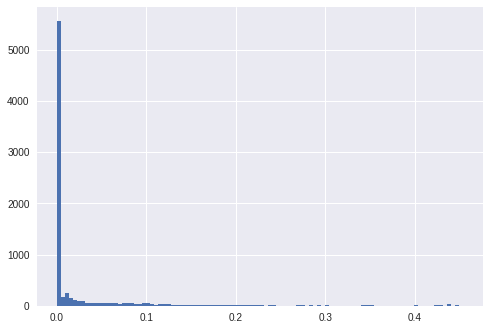

In [24]:
plt.hist(res.x, bins=100)
plt.show()

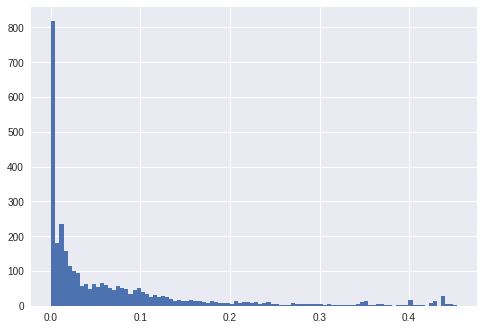

In [25]:
plt.hist(res.x[res.x.round(3)!=0.000], bins=100)
plt.show()

In [0]:
Itinerary = fare_data['Itinerary'].values

In [27]:
print("The itinerary with the highest demand of %f is %s"%(np.max(res.x),Itinerary[res.x == np.max(res.x)]))

The itinerary with the highest demand of 0.453703 is ['445347**G******20020920']


In [28]:
Itinerary[np.flip(np.argsort(res.x),0)]

array(['445347**G******20020920', '32496**I******20020920',
       '14798FRICDGTUN20020920', ..., '21058164AEIDXBGVA20020920',
       '21058164CHIDXBGVA20020920', '21058593CHIDXBGVA20020920'],
      dtype=object)

In [30]:
itinerary_demand = pd.DataFrame({'Itinerary': Itinerary[np.flip(np.argsort(res.x),0)],'Demand_solution': res.x[np.flip(np.argsort(res.x),0)]})
itinerary_demand.head()

,Demand_solution,Itinerary
0,0.453703,445347**G******20020920
1,0.444859,32496**I******20020920
2,0.444859,14798FRICDGTUN20020920
3,0.444859,173106**G******20020920
4,0.444859,5336**I******20020920


In [0]:
def flight_details(input_key):
  for k,v in flight_it_dict.items():
    if k == input_key:
      return v

In [0]:
itinerary_demand['Flight_details'] = itinerary_demand.Itinerary.apply(flight_details)

In [33]:
itinerary_demand.head(15)

,Demand_solution,Itinerary,Flight_details
0,0.453703,445347**G******20020920,[LX0108120020920FRAZRHY]
1,0.444859,32496**I******20020920,[LX0064720020920CDGZRHY]
2,0.444859,14798FRICDGTUN20020920,[LX0064720020920CDGZRHY]
3,0.444859,173106**G******20020920,[LX0064720020920CDGZRHY]
4,0.444859,5336**I******20020920,[LX0064720020920CDGZRHY]
5,0.444859,36603**I******20020920,[LX0064720020920CDGZRHY]
6,0.444859,27660FRICDGTUN20020920,[LX0064720020920CDGZRHY]
7,0.442976,24889**GZRHPRG20020920,[LX0148620020920ZRHPRGY]
8,0.442976,47483CHIZRHPRG20020920,[LX0148620020920ZRHPRGY]
9,0.442976,24889CHGZRHPRG20020920,[LX0148620020920ZRHPRGY]


In [34]:
itinerary_demand.shape
len(itinerary_demand.Demand_solution.round(5).unique())

2355

In [35]:
for lab, row in itinerary_demand.iterrows():
  if lab < 15:
    print("The Itineary is " + row['Itinerary'] + " and the demand is "+ str(row['Demand_solution']))
  else:
    break
   

The Itineary is 445347**G******20020920 and the demand is 0.4537030992498186
The Itineary is 32496**I******20020920 and the demand is 0.4448590879430726
The Itineary is 14798FRICDGTUN20020920 and the demand is 0.4448590879430719
The Itineary is 173106**G******20020920 and the demand is 0.44485908794306145
The Itineary is 5336**I******20020920 and the demand is 0.44485908794306117
The Itineary is 36603**I******20020920 and the demand is 0.44485908794305484
The Itineary is 27660FRICDGTUN20020920 and the demand is 0.4448590879430539
The Itineary is 24889**GZRHPRG20020920 and the demand is 0.4429760531244266
The Itineary is 47483CHIZRHPRG20020920 and the demand is 0.4429760531244226
The Itineary is 24889CHGZRHPRG20020920 and the demand is 0.442976053124415
The Itineary is 34920**I******20020920 and the demand is 0.442419041481141
The Itineary is 7947**I******20020919 and the demand is 0.4398722952811725
The Itineary is 20847**I******20020919 and the demand is 0.439872295281172
The Itineary

In [52]:
#list of itinerary having more than 2 possible flights
itinerary_demand[np.array([ len(i) for i in itinerary_demand.Flight_details ]) > 1].head()

,Demand_solution,Itinerary,Flight_details
87,0.380447,226040**G******20020920,"[LX0130520020920OSLZRHY, LX0056220020920ZRHNCEY]"
88,0.376806,81151**G******20020920,"[LX0280520020920GVAZRHY, LX0148620020920ZRHPRGY]"
89,0.376806,81151CHGGVAPRG20020920,"[LX0280520020920GVAZRHY, LX0148620020920ZRHPRGY]"
102,0.358973,242580**I******20020920,"[LX0039820020920JERGCIY, LX0039820020920GCIZRHY]"
109,0.350882,23387**I******20020920,"[LX0024720020920KHIDXBC, LX0024720020920DXBZRHC]"


In [56]:
#list of itinerary having more than 2 possible flights
itinerary_demand[np.array([ len(i) for i in itinerary_demand.Flight_details ]) > 2]

,Demand_solution,Itinerary,Flight_details
166,2.906860e-01,62390**I******20020919,"[LX0009520020919EZEGRUY, LX0009520020919GRUZRH..."
217,2.435433e-01,135753**I******20020919,"[LX0009520020919EZEGRUY, LX0009520020919GRUZRH..."
225,2.404918e-01,130941**I******20020919,"[LX0009520020919EZEGRUY, LX0009520020919GRUZRH..."
322,1.892905e-01,29597**I******20020919,"[LX0009520020919EZEGRUY, LX0009520020919GRUZRH..."
585,1.167127e-01,331528**I******20020919,"[LX0009520020919EZEGRUC, LX0009520020919GRUZRH..."
746,9.643141e-02,334387**I******20020919,"[LX0009520020919EZEGRUY, LX0009520020919GRUZRH..."
1249,5.127185e-02,338882**I******20020919,"[LX0009520020919EZEGRUY, LX0009520020919GRUZRH..."
1562,2.942185e-02,59868**I******20020919,"[LX0009520020919EZEGRUY, LX0009520020919GRUZRH..."
1789,1.889234e-02,138465**I******20020919,"[LX0009520020919EZEGRUY, LX0009520020919GRUZRH..."
1811,1.816391e-02,569802**I******20020919,"[LX0009520020919EZEGRUY, LX0009520020919GRUZRH..."
